In [1]:
# Dependencies
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import plotly.graph_objects as go
import datetime as DT
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# MAKE SURE THAT THE DATA IS ORGANIZED BY MOST RECENT ON TOP.

data = pd.read_csv("data/race_data.csv")

positive_index = data.columns.get_loc("Positives") - 1
death_index = data.columns.get_loc("Deaths") - 1
negative_index = data.columns.get_loc("Negatives") - 1
last_index = negative_index + (negative_index - death_index)

data_df = data.iloc[:, np.r_[1:last_index]]

data_df = data_df.iloc[:, :-1]

data_df.columns = data_df.iloc[1]
data_df = data_df.rename(columns = {data_df.columns[0]: "State"})
data_df = data_df.drop([0,1])
data_df = data_df.drop_duplicates(subset = "State", keep = "first")

new_last_index = last_index-2

data_df
# positive_index, death_index, negative_index, last_index, new_last_index

1,State,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,...,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown
2,AK,NaN,NaN,5/27 14:15,5/27 22:16,JDL,BL,412,264,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,NaN,NaN,5/27 0:00,5/27 22:29,JDL,RV,16032,6273,6730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AR,NaN,NaN,5/27 19:13,5/27 22:43,JDL,RV,6277,3012,2194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS,NaN,NaN,NaN,5/27 22:45,JDL,RV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AZ,NaN,NaN,5/27 0:00,5/27 22:53,JDL,RV,17262,3548,555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CA,NaN,NaN,5/27 0:00,5/27 23:15,JDL,RV,98980,14640,3797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CO,NaN,NaN,5/27 0:00,5/27 23:20,JDL,RV,24767,8661,1483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CT,NaN,NaN,5/26 20:30,5/27 23:22,JDL,RV,41288,13951,5248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,DC,NaN,NaN,5/26 0:00,5/27 23:33,JDL,RV,8406,1293,3839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,DE,NaN,NaN,5/26 18:00,5/27 22:36,SPA,RV,9096,2645,2430,...,696,NaN,NaN,NaN,2679,10164,22%,3369,32792,10164


In [3]:
drop_columns = ["Update Time", "Source", "Last Check", "Checker", "DC"]

positive_df = data_df.iloc[:, np.r_[0:positive_index, positive_index:death_index]]
# positive_df = positive_df.iloc[:, :-1]
positive_df = positive_df.drop(drop_columns, axis = 1)

death_df = data_df.iloc[:, np.r_[0:positive_index, death_index:negative_index]]
# death_df = death_df.iloc[:, :-1]
death_df = death_df.drop(drop_columns, axis = 1)

# Note negatives data does not have a total column
negative_df = data_df.iloc[:, np.r_[0:positive_index, negative_index:new_last_index]]
# negative_df = negative_df.iloc[:, :-1]
negative_df = negative_df.drop(drop_columns, axis = 1)

In [4]:
pop_data = pd.read_csv("data/race_pop_data.csv")
pop_data_df = pop_data.iloc[:, 4:-1]

pop_us = pd.DataFrame(pop_data_df.sum()).T

pop_us.loc[[0], "State"] = "# US"
pop_us = pop_us.rename(columns = {"State": "ID"})

pop_columns = pop_us.columns
pop_columns

Index(['ID', 'Total', 'Black', 'Hispanic', 'Asian', 'NHPI', 'AIAN',
       'Two or more', 'White', 'Other'],
      dtype='object')

In [5]:
# https://www.census.gov/quickfacts/fact/table/US/PST045219
# US_pop = 328239523

# US_white_alone = .765
# US_white_nonHispanic = .604
# US_black = .134
# US_LatinX = 0
# US_AIAN = .013
# US_asian = .059
# US_NHPI = .002
# US_Multiracial = .027 
# US_Hispanic = .173
# US_NonHispanic =1 - US_Hispanic
# US_LatinX = US_Hispanic

# race_array = [1, US_white_nonHispanic, US_black, 
#               US_LatinX, US_asian, US_AIAN, US_NHPI, 
#               US_Multiracial, np.nan, np.nan, 
#               US_Hispanic, US_NonHispanic, np.nan]

# Order of Array
# ['ID', 'Total', 'Known White ', 'Known Black ',
#        'Known LatinX / Hispanic', 'Known Asian', 'Known AIAN', 'Known NHPI',
#        'Known Multiracial ', 'Other', 'Unknown Race', 'Known Hispanic',
#        'Known Non-Hispanic', 'Unknown Ethnicity']

# Deaths

In [6]:
deaths_unknown_state = death_df[["State", "% Unk."]]
deaths_unknown_state.columns = ["State", "% Unknown Race", "% Unknown Ethnicity"]
deaths_unknown_state.fillna("100%", inplace = True)
deaths_unknown_state = deaths_unknown_state.set_index("State")
deaths_unknown_state['% Unknown Race'] = deaths_unknown_state['% Unknown Race'].str.rstrip('%').astype('float')
deaths_unknown_state['% Unknown Ethnicity'] = deaths_unknown_state['% Unknown Ethnicity'].str.rstrip('%').astype('float')
deaths_unknown_state = deaths_unknown_state.sort_values("% Unknown Ethnicity", ascending = False)
deaths_unknown_state = deaths_unknown_state.sort_values("% Unknown Race", ascending = False)
deaths_unknown_state

,% Unknown Race,% Unknown Ethnicity
State,,
WY,100.0,100.0
GU,100.0,100.0
AS,100.0,100.0
NM,100.0,100.0
PR,100.0,100.0
HI,100.0,100.0
UT,100.0,100.0
VI,100.0,100.0
MP,100.0,100.0


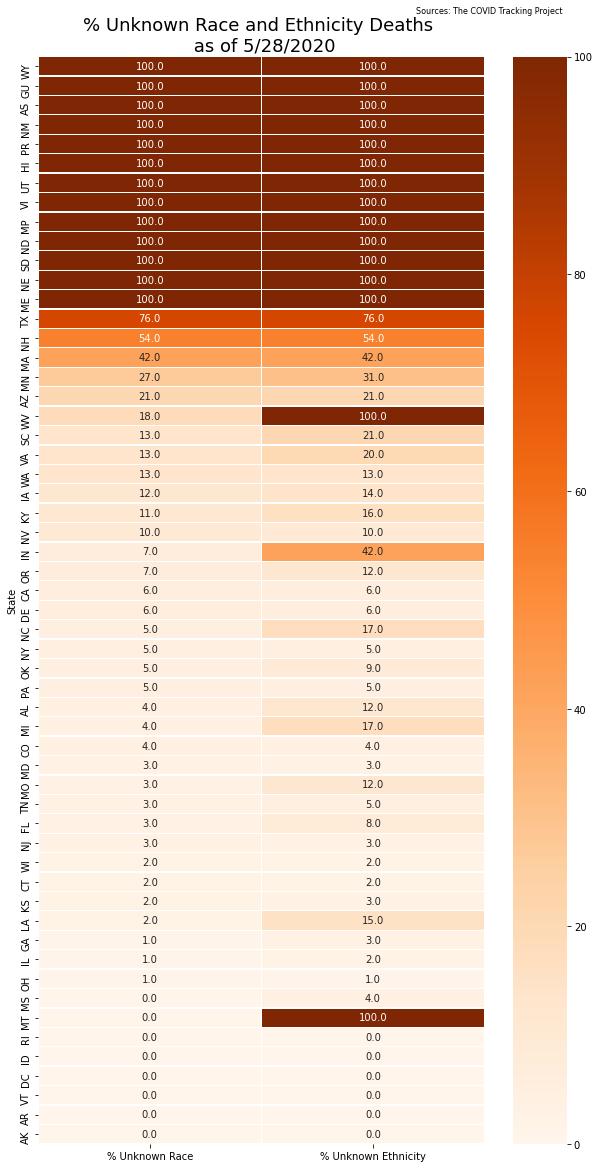

In [7]:
fig, ax = plt.subplots(figsize=(10,20))
title = "% Unknown Race and Ethnicity Deaths \n as of 5/28/2020"

plt.title(title, fontsize=18)

sns.heatmap(deaths_unknown_state, cmap = 'Oranges', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax)

# plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

# textstr = "US Census Population Estimates"
# plt.gcf().text(.70, .90, textstr, fontsize=8)

# textstr = "Created by: Heain Yee"
# plt.gcf().text(.65, .89, textstr, fontsize=8)

plt.savefig("images/%UnknownDeaths")

plt.show()

In [8]:
deaths_states = death_df.copy()
deaths_states = deaths_states.drop(["State", "Update Time (Et)", "% Unk."], axis = 1)
deaths_states.fillna(0, inplace = True)

for column in deaths_states.columns:
    deaths_states[column] = deaths_states[column].astype('float')

new_col = ['Total',
 'White',
 'Black',
 'LatinX / Hispanic',
 'Asian',
 'AIAN',
 'NHPI',
 'Two or more',
 'Other',
 'Unknown Race',
 'Hispanic',
 'Non-Hispanic',
 'Unknown Ethnicity']

deaths_states.columns = new_col
deaths_states

deaths_states = deaths_states[pop_columns[1:]]

deaths_us = pd.DataFrame(deaths_states.sum()).T

deaths_us ["ID"] = ["# Known Deaths"]
cols = list(deaths_us.columns.values)
cols = cols[-1:] + cols[:-1]
deaths_us = deaths_us[cols]

deaths_us = pd.concat([deaths_us, pop_us])

deaths_us = deaths_us.append({"ID": "% Known Deaths"}, ignore_index = True)
deaths_us = deaths_us.append({"ID": "% US"}, ignore_index = True)

deaths_us

,ID,Total,Black,Hispanic,Asian,NHPI,AIAN,Two or more,White,Other
0,# Known Deaths,94218,20988,13565,3756,63,287,190,43767,3421
1,# US,322903030,40130920,4.39318e+07,17421159,549504,2264689,8490244,206723250,3391445
2,% Known Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,% US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for column in deaths_us.columns:
    if column != "ID":
        values = (deaths_us[column]/deaths_us['Total']).values
        deaths_us.loc[[2], column] = values[0]*100
        deaths_us.loc[[3], column] = values[1]*100

deaths_us

,ID,Total,Black,Hispanic,Asian,NHPI,AIAN,Two or more,White,Other
0,# Known Deaths,94218,20988,13565,3756,63,287,190,43767,3421
1,# US,322903030,40130920,4.39318e+07,17421159,549504,2264689,8490244,206723250,3391445
2,% Known Deaths,100,22.276,14.3975,3.9865,0.0668662,0.304613,0.20166,46.4529,3.63094
3,% US,100,12.4282,13.6053,5.39517,0.170176,0.701353,2.62935,64.0202,1.0503


In [10]:
deaths_us_total = deaths_us["Total"][0]/deaths_us["Total"][1]*100000
deaths_us_total

deaths_us["Total"][0], deaths_us["Total"][1], deaths_us_total

(94218.0, 322903030, 29.178419292008503)

In [11]:
# i = 0
# for column in deaths_unknown_us.columns:
#     if column != "ID":
#         value = (deaths_unknown_us[column]/deaths_unknown_us['Total']).values[0]
#         deaths_unknown_us.loc[[2], column] = value*100
#         deaths_unknown_us.loc[[3], column] = race_array[i]*100
        
#         i = i+1
# deaths_unknown_us

In [12]:
deaths_us_T = deaths_us.copy()
deaths_us_T = deaths_us_T.T.rename_axis('ID').reset_index()

deaths_us_T.columns = deaths_us_T.iloc[0]
deaths_us_T = deaths_us_T.drop([0]).set_index("ID")
deaths_us_T = deaths_us_T.drop(["Total"])

deaths_us_T["Difference %"] = deaths_us_T["% US"]- deaths_us_T["% Known Deaths"]
deaths_us_T["Affected per 100000"] = deaths_us_T["# Known Deaths"]/deaths_us_T["# US"]*100000

deaths_us_T_percap = deaths_us_T[['# Known Deaths', '# US', 'Affected per 100000']]
deaths_us_T_percap = deaths_us_T_percap.sort_values("Affected per 100000", ascending = False)

deaths_us_T_rep = deaths_us_T[['% Known Deaths','% US','Difference %']]
deaths_us_T_rep = deaths_us_T_rep.sort_values("Difference %", ascending = False)

In [13]:
deaths_us_T_percap

,# Known Deaths,# US,Affected per 100000
ID,,,
Other,3421,3391445,100.871
Black,20988,40130920,52.2988
Hispanic,13565,4.39318e+07,30.8774
Asian,3756,17421159,21.56
White,43767,206723250,21.1718
AIAN,287,2264689,12.6728
NHPI,63,549504,11.4649
Two or more,190,8490244,2.23786


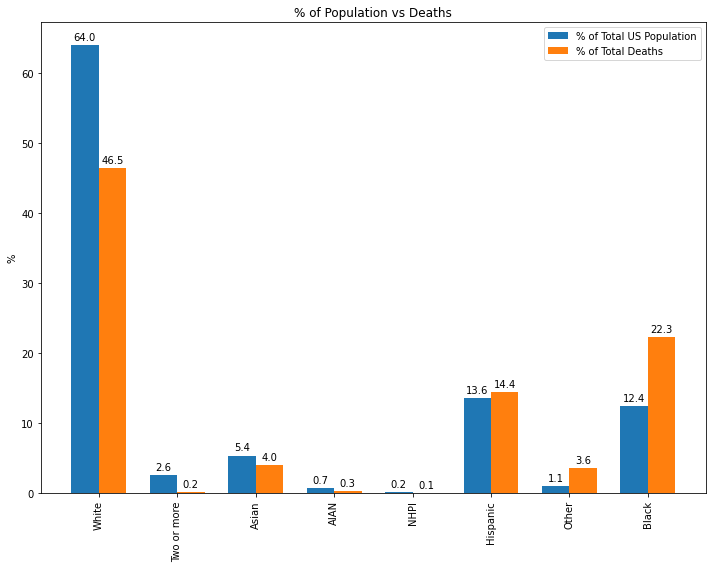

In [14]:
percent_chart = deaths_us_T.sort_values("Difference %", ascending = False).reset_index()
percent_chart

labels = percent_chart["ID"]
us = percent_chart["% US"]
positives = percent_chart["% Known Deaths"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, us, width, label='% of Total US Population')
rects2 = ax.bar(x + width/2, positives, width, label='% of Total Deaths')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Population vs Deaths')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("images/%PopulationvsDeaths")

plt.show()

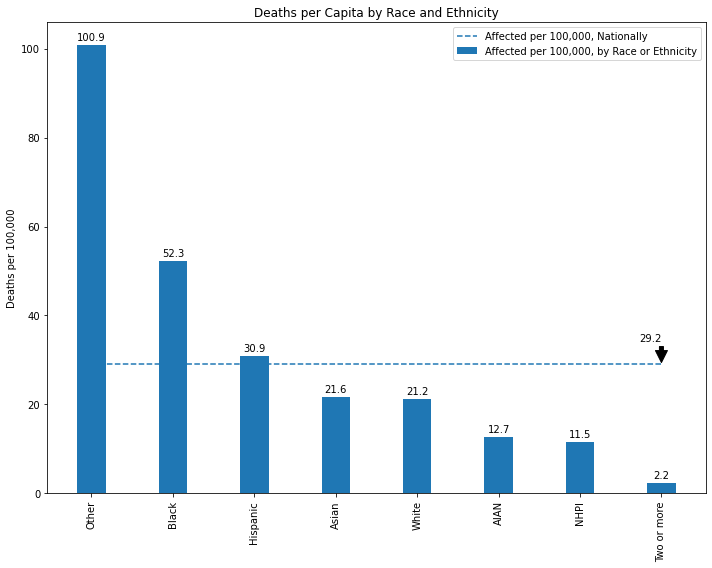

In [15]:
percap_chart = deaths_us_T.sort_values("Affected per 100000", ascending = False).reset_index()

labels = percap_chart["ID"]
affected = percap_chart["Affected per 100000"]

x = np.arange(len(labels))  # the label locations

y_mean = [deaths_us_total]*len(x)

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, affected, width, label='Affected per 100,000, by Race or Ethnicity')
mean_line = ax.plot(x,y_mean, label='Affected per 100,000, Nationally', linestyle='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Deaths per 100,000')
ax.set_title('Deaths per Capita by Race and Ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

ax.annotate('{:.1f}'.format(deaths_us_total),
            xy=(len(x)-1, deaths_us_total), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')

fig.tight_layout()

plt.savefig("images/DeathsAffectedperCapita")

plt.show()

# Positive Cases

In [16]:
positive_unknown_state = positive_df[["State", "% Unk."]]
positive_unknown_state.columns = ["State", "% Unknown Race", "% Unknown Ethnicity"]
positive_unknown_state.fillna("100%", inplace = True)
positive_unknown_state = positive_unknown_state.set_index("State")
positive_unknown_state['% Unknown Race'] = positive_unknown_state['% Unknown Race'].str.rstrip('%').astype('float')
positive_unknown_state['% Unknown Ethnicity'] = positive_unknown_state['% Unknown Ethnicity'].str.rstrip('%').astype('float')
positive_unknown_state = positive_unknown_state.sort_values("% Unknown Ethnicity", ascending = False)
positive_unknown_state = positive_unknown_state.sort_values("% Unknown Race", ascending = False)
# positive_unknown_state

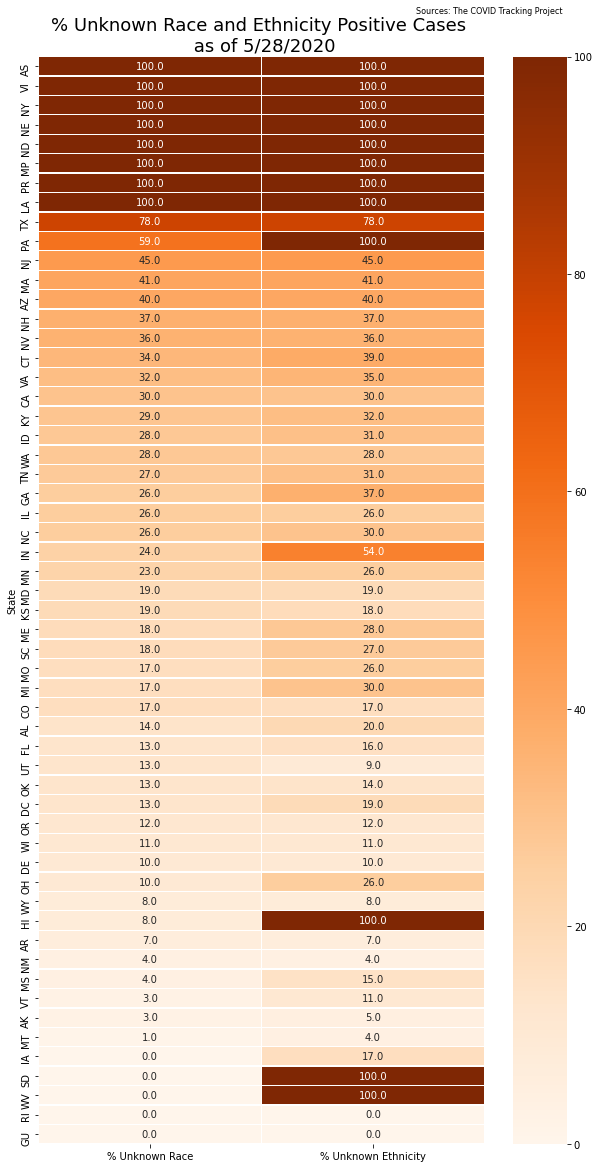

In [17]:
fig, ax = plt.subplots(figsize=(10,20))
title = "% Unknown Race and Ethnicity Positive Cases \n as of 5/28/2020"

plt.title(title, fontsize=18)

sns.heatmap(positive_unknown_state, cmap = 'Oranges', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax)

# plt.xlabel ("final date of the week")

textstr = "Sources: The COVID Tracking Project"
plt.gcf().text(.65, .91, textstr, fontsize=8)

# textstr = "US Census Population Estimates"
# plt.gcf().text(.70, .90, textstr, fontsize=8)

# textstr = "Created by: Heain Yee"
# plt.gcf().text(.65, .89, textstr, fontsize=8)

plt.savefig("images/%UnknownPositiveCases")

plt.show()

In [18]:
positive_states = positive_df.copy()
positive_states = positive_states.drop(["State", "Update Time (Et)", "% Unk."], axis = 1)
positive_states.fillna(0, inplace = True)

for column in positive_states.columns:
    positive_states[column] = positive_states[column].astype('float')

new_col = ['Total',
 'White',
 'Black',
 'LatinX / Hispanic',
 'Asian',
 'AIAN',
 'NHPI',
 'Two or more',
 'Other',
 'Unknown Race',
 'Hispanic',
 'Non-Hispanic',
 'Unknown Ethnicity']

positive_states.columns = new_col

positive_states = positive_states[pop_columns[1:]]

positive_us = pd.DataFrame(positive_states.sum()).T

positive_us ["ID"] = ["# Known Positive"]
cols = list(positive_us.columns.values)
cols = cols[-1:] + cols[:-1]
positive_us = positive_us[cols]

positive_us = pd.concat([positive_us, pop_us])

positive_us = positive_us.append({"ID": "% Known Positive"}, ignore_index = True)
positive_us = positive_us.append({"ID": "% US"}, ignore_index = True)
positive_us

,ID,Total,Black,Hispanic,Asian,NHPI,AIAN,Two or more,White,Other
0,# Known Positive,1.69006e+06,198672,261901,32259,2342,9974,8509,355939,73140
1,# US,322903030,40130920,4.39318e+07,17421159,549504,2264689,8490244,206723250,3391445
2,% Known Positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,% US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
for column in positive_us.columns:
    if column != "ID":
        values = (positive_us[column]/positive_us['Total']).values
        positive_us.loc[[2], column] = values[0]*100
        positive_us.loc[[3], column] = values[1]*100
        
positive_us

,ID,Total,Black,Hispanic,Asian,NHPI,AIAN,Two or more,White,Other
0,# Known Positive,1.69006e+06,198672,261901,32259,2342,9974,8509,355939,73140
1,# US,322903030,40130920,4.39318e+07,17421159,549504,2264689,8490244,206723250,3391445
2,% Known Positive,100,11.7553,15.4965,1.90874,0.138575,0.590155,0.503472,21.0607,4.32765
3,% US,100,12.4282,13.6053,5.39517,0.170176,0.701353,2.62935,64.0202,1.0503


In [20]:
positive_us_total = positive_us["Total"][0]/positive_us["Total"][1]*100000
positive_us_total

positive_us["Total"][0], positive_us["Total"][1], positive_us_total

(1690064.0, 322903030, 523.396760940893)

In [21]:
# i = 0
# for column in positive_unknown_us.columns:
#     if column != "ID":
#         positive_unknown_us.loc[[2], column] = race_array[i]*US_pop
#         positive_unknown_us.loc[[3], column] = race_array[i]*100
        
#         i = i+1
# positive_unknown_us

In [22]:
positive_us_T = positive_us.copy()
positive_us_T = positive_us_T.T.rename_axis('ID').reset_index()

positive_us_T.columns = positive_us_T.iloc[0]
positive_us_T = positive_us_T.drop([0]).set_index("ID")
# positive_unknown_us_T = positive_unknown_us_T[["ID","% Known Positive", "% US"]]
positive_us_T = positive_us_T.drop(["Total"])

positive_us_T["Difference %"] = positive_us_T["% US"]- positive_us_T["% Known Positive"]
positive_us_T["Affected per 100000"] = positive_us_T["# Known Positive"]/positive_us_T["# US"]*100000

positive_us_T_percap = positive_us_T[['# Known Positive', '# US', 'Affected per 100000']]
positive_us_T_percap = positive_us_T_percap.sort_values("Affected per 100000", ascending = False)

positive_us_T_rep = positive_us_T[['% Known Positive','% US','Difference %']]
positive_us_T_rep = positive_us_T_rep.sort_values("Difference %", ascending = False)

In [23]:
positive_us_T_percap

,# Known Positive,# US,Affected per 100000
ID,,,
Other,73140,3391445,2156.6
Hispanic,261901,4.39318e+07,596.153
Black,198672,40130920,495.06
AIAN,9974,2264689,440.414
NHPI,2342,549504,426.203
Asian,32259,17421159,185.171
White,355939,206723250,172.181
Two or more,8509,8490244,100.221


In [24]:
positive_us_T_rep

,% Known Positive,% US,Difference %
ID,,,
White,21.0607,64.0202,42.9595
Asian,1.90874,5.39517,3.48642
Two or more,0.503472,2.62935,2.12588
Black,11.7553,12.4282,0.67287
AIAN,0.590155,0.701353,0.111197
NHPI,0.138575,0.170176,0.0316015
Hispanic,15.4965,13.6053,-1.89125
Other,4.32765,1.0503,-3.27735


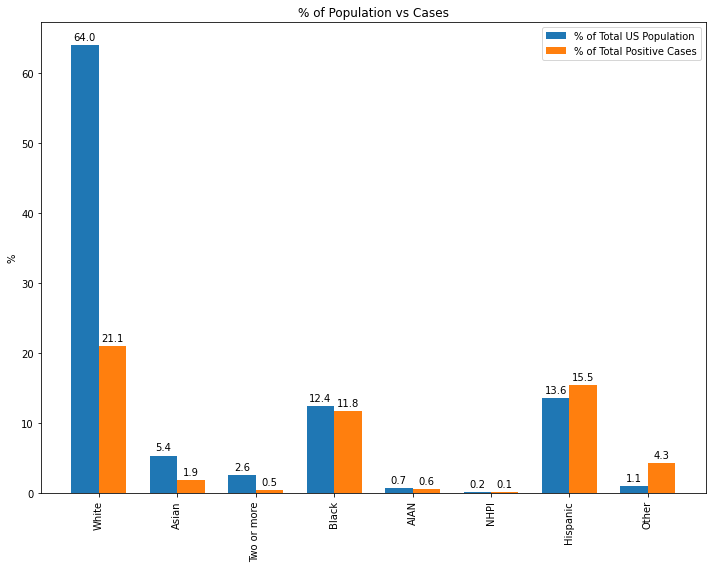

In [25]:
percent_chart = positive_us_T.sort_values("Difference %", ascending = False).reset_index()
percent_chart

labels = percent_chart["ID"]
us = percent_chart["% US"]
positives = percent_chart["% Known Positive"]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x - width/2, us, width, label='% of Total US Population')
rects2 = ax.bar(x + width/2, positives, width, label='% of Total Positive Cases')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('%')
ax.set_title('% of Population vs Cases')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.savefig("images/%PopulationvsCases")

plt.show()

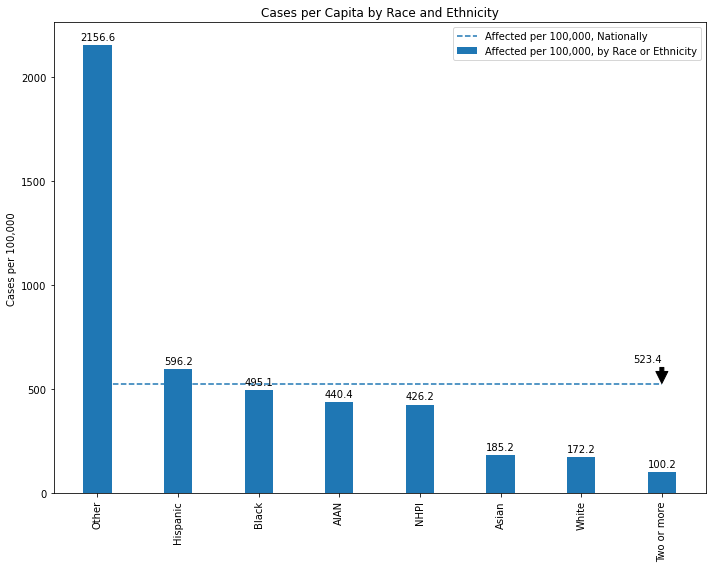

In [26]:
percap_chart = positive_us_T.sort_values("Affected per 100000", ascending = False).reset_index()

labels = percap_chart["ID"]
affected = percap_chart["Affected per 100000"]

x = np.arange(len(labels))  # the label locations

y_mean = [positive_us_total]*len(x)

fig, ax = plt.subplots(figsize=(10,8))
rects1 = ax.bar(x, affected, width, label='Affected per 100,000, by Race or Ethnicity')
mean_line = ax.plot(x,y_mean, label='Affected per 100,000, Nationally', linestyle='--')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cases per 100,000')
ax.set_title('Cases per Capita by Race and Ethnicity')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=90)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.1f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

ax.annotate('{:.1f}'.format(positive_us_total),
            xy=(len(x)-1, positive_us_total), xycoords='data',
            xytext=(0, 20), textcoords='offset points',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='bottom')


fig.tight_layout()

plt.savefig("images/CasesAffectedperCapita")

plt.show()

# Death Rate Heat Map

In [27]:
dr_data = data

positive_index = dr_data.columns.get_loc("Positives") - 1
death_index = dr_data.columns.get_loc("Deaths") - 1
negative_index = dr_data.columns.get_loc("Negatives") - 1
last_index = negative_index + (negative_index - death_index)

dr_data_df = dr_data.iloc[:, np.r_[1:last_index]]

dr_data_df = dr_data_df.iloc[:, :-1]

dr_data_df.columns = dr_data_df.iloc[1]
dr_data_df = dr_data_df.rename(columns = {dr_data_df.columns[0]: "State"})
dr_data_df = dr_data_df.drop([0,1])
dr_data_present_df = data_df.drop_duplicates(subset = "State", keep = "first")

start_date = '4/1/2020'
end_date = '4/30/2020'

dr_data_past_df = dr_data_df.sort_values("State")
# test = test.dropna(axis = 0, subset = ["Update Time (Et)"])

date_filter = (dr_data_past_df["Update Time (Et)"] > start_date) & (dr_data_past_df["Update Time (Et)"] <= end_date)

dr_data_past_df = dr_data_past_df.loc[date_filter]
dr_data_past_df = dr_data_past_df.sort_values(["Update Time (Et)"], ascending = False)
dr_data_past_df = dr_data_past_df.drop_duplicates(subset = "State", keep = "first")
dr_data_past_df = dr_data_past_df.sort_values(["State"])
dr_data_past_df
# dr_data_present_df

1,State,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,...,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown
450,AK,NaN,NaN,4/29 14:00,4/29 22:45,SPA,AM,355,206,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,AL,NaN,NaN,4/29 0:00,4/29 23:04,SPA,AM,6925,3186,2646,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,AR,NaN,NaN,4/29 11:00,4/29 23:27,SPA,AM,3192,1591,1026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
454,AZ,NaN,NaN,4/29 0:00,4/29 23:32,SPA,AM,7202,2046,240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
455,CA,NaN,NaN,4/28 0:00,4/29 23:29,BL,AM,46500,8339,1977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,CO,NaN,NaN,4/29 0:00,4/29 23:21,BL,AM,14758,7460,1131,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
457,CT,NaN,NaN,4/29 12:00,4/29 23:07,BL,AM,26767,8504,3105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,DC,NaN,NaN,4/28 0:00,4/29 22:59,BL,AM,4106,703,2037,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,DE,NaN,NaN,4/28 0:00,4/29 22:49,BL,AFG,4655,1184,1292,...,283,NaN,NaN,993,NaN,2959,18%,931,12993,2959
460,FL,NaN,NaN,4/29 9:51,4/30 0:08,BL,ESK,32318,16146,5745,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
dr_data_present_df
# Differenecs between Present and Past:
#  'AS',
#  'GU',
#  'MP',
#  'ND',
#  'NE',
#  'NV',
#  'PR',
#  'SD',
#  'VI',

1,State,Update Time,Source,Update Time (Et),Last Check,Checker,DC,Total,Known White,Known Black,...,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown
2,AK,NaN,NaN,5/27 14:15,5/27 22:16,JDL,BL,412,264,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,NaN,NaN,5/27 0:00,5/27 22:29,JDL,RV,16032,6273,6730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AR,NaN,NaN,5/27 19:13,5/27 22:43,JDL,RV,6277,3012,2194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,AS,NaN,NaN,NaN,5/27 22:45,JDL,RV,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,AZ,NaN,NaN,5/27 0:00,5/27 22:53,JDL,RV,17262,3548,555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,CA,NaN,NaN,5/27 0:00,5/27 23:15,JDL,RV,98980,14640,3797,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,CO,NaN,NaN,5/27 0:00,5/27 23:20,JDL,RV,24767,8661,1483,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,CT,NaN,NaN,5/26 20:30,5/27 23:22,JDL,RV,41288,13951,5248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,DC,NaN,NaN,5/26 0:00,5/27 23:33,JDL,RV,8406,1293,3839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,DE,NaN,NaN,5/26 18:00,5/27 22:36,SPA,RV,9096,2645,2430,...,696,NaN,NaN,NaN,2679,10164,22%,3369,32792,10164


In [29]:
drop_columns = ["Update Time", "Source", "Last Check", "Checker", "DC"]

positive_present_df = dr_data_present_df.iloc[:, np.r_[0:positive_index, positive_index:death_index]]
# positive_df = positive_df.iloc[:, :-1]
positive_present_df = positive_present_df.drop(drop_columns, axis = 1)

death_present_df = dr_data_present_df.iloc[:, np.r_[0:positive_index, death_index:negative_index]]
# death_df = death_df.iloc[:, :-1]
death_present_df = death_present_df.drop(drop_columns, axis = 1)

positive_past_df = dr_data_past_df.iloc[:, np.r_[0:positive_index, positive_index:death_index]]
# positive_df = positive_df.iloc[:, :-1]
positive_past_df = positive_past_df.drop(drop_columns, axis = 1).reset_index(drop = True)

death_past_df = dr_data_past_df.iloc[:, np.r_[0:positive_index, death_index:negative_index]]
# death_df = death_df.iloc[:, :-1]
death_past_df = death_past_df.drop(drop_columns, axis = 1).reset_index(drop = True)

In [30]:
dataframes = [positive_past_df, positive_present_df, death_past_df, death_present_df]
framenames = ["Past Positive Cases", "Present Positive Cases", "Past Deaths", "Present Deaths"]

new_col = ['Total',
 'White',
 'Black',
 'LatinX / Hispanic',
 'Asian',
 'AIAN',
 'NHPI',
 'Two or more',
 'Other',
 'Unknown Race',
 'Hispanic',
 'Non-Hispanic',
 'Unknown Ethnicity']

deathrate_df = pd.DataFrame(index=new_col)
i = 0

for frame in dataframes:    
    test = frame.iloc[:, 2:]
    test = test.drop(["% Unk."], axis = 1)
    test.columns = new_col

    for column in test.columns:
        test[column] = test[column].astype('float')
    
    deathrate_df[framenames[i]] = test.sum()
    i = i +1

deathrate_df = deathrate_df.drop(["LatinX / Hispanic"])

In [31]:
deathrate_df["Past Case to Death Rate (End of April)"] = deathrate_df["Past Deaths"]/deathrate_df["Past Positive Cases"]*100
deathrate_df["Present Case to Death Rate (End of May)"] = deathrate_df["Present Deaths"]/deathrate_df["Present Positive Cases"]*100
deathrate_df

,Past Positive Cases,Present Positive Cases,Past Deaths,Present Deaths,Past Case to Death Rate (End of April),Present Case to Death Rate (End of May)
Total,581274.0,1690064.0,51807.0,94218.0,8.912664,5.574818
White,181363.0,355939.0,19048.0,43767.0,10.502693,12.296208
Black,98583.0,198672.0,10364.0,20988.0,10.512969,10.564146
Asian,12588.0,32259.0,1666.0,3756.0,13.234827,11.643262
AIAN,3948.0,9974.0,121.0,287.0,3.064843,2.877481
NHPI,1225.0,2342.0,37.0,63.0,3.020408,2.690009
Two or more,5767.0,8509.0,133.0,190.0,2.306225,2.232930
Other,24370.0,73140.0,1138.0,3421.0,4.669676,4.677331
Unknown Race,192240.0,810068.0,12457.0,8939.0,6.479921,1.103488
Hispanic,81485.0,261901.0,2476.0,13565.0,3.038596,5.179438


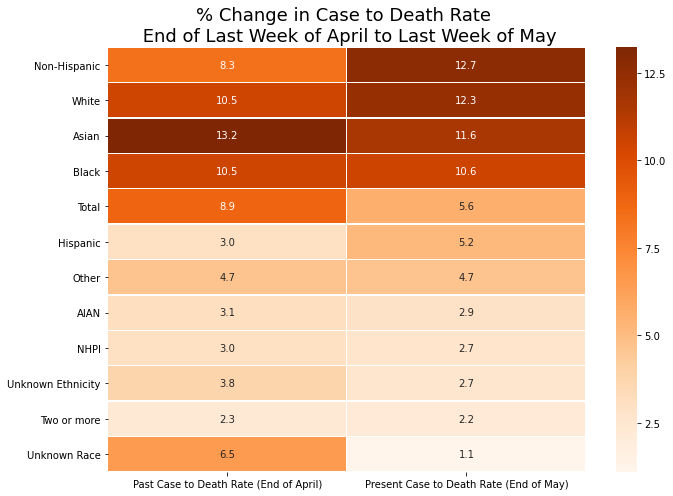

In [32]:
fig, ax = plt.subplots(figsize=(10,7))
title = "% Change in Case to Death Rate \n End of Last Week of April to Last Week of May"
chart_df = deathrate_df[["Past Case to Death Rate (End of April)", "Present Case to Death Rate (End of May)"]]
chart_df = chart_df.sort_values("Present Case to Death Rate (End of May)", ascending = False)

plt.title(title, fontsize=18)

sns.heatmap(chart_df, cmap = 'Oranges', linewidths = 0.30, annot =True, fmt = '.1f', ax=ax)

# plt.xlabel ("final date of the week")

# textstr = "Sources: The COVID Tracking Project"
# plt.gcf().text(.65, .91, textstr, fontsize=8)

# textstr = "US Census Population Estimates"
# plt.gcf().text(.70, .90, textstr, fontsize=8)

# textstr = "Created by: Heain Yee"
# plt.gcf().text(.65, .89, textstr, fontsize=8)
fig.tight_layout()

plt.savefig("images/%CasetoDeathbyRace")

plt.show()

In [33]:
positive_past_df
# positive_present_df

1,State,Update Time (Et),Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.
0,AK,4/29 14:00,355,206,7,NaN,43,19,8,10,9,53,15%,25,232,NaN,0%
1,AL,4/29 0:00,6925,3186,2646,NaN,52,NaN,NaN,NaN,196,843,12%,378,5310,1236,18%
2,AR,4/29 11:00,3192,1591,1026,125,40,NaN,NaN,13,77,406,12%,NaN,NaN,NaN,NaN
3,AZ,4/29 0:00,7202,2046,240,1207,91,931,NaN,NaN,120,2567,36%,1207,3428,2567,36%
4,CA,4/28 0:00,46500,8339,1977,13608,3721,71,71,249,2033,16117,35%,13608,16775,16117,35%
5,CO,4/29 0:00,14758,7460,1131,NaN,395,78,78,203,134,4,0%,5275,9479,4,0%
6,CT,4/29 12:00,26767,8504,3105,4108,390,NaN,NaN,NaN,198,10462,39%,4108,12197,10462,39%
7,DC,4/28 0:00,4106,703,2037,NaN,64,11,11,770,NaN,513,12%,797,2490,819,20%
8,DE,4/28 0:00,4655,1184,1292,936,1,NaN,NaN,237,NaN,943,21%,936,2776,943,20%
9,FL,4/29 9:51,32318,16146,5745,NaN,NaN,NaN,NaN,NaN,2678,7749,24%,9325,14305,8688,27%


In [34]:
death_past_df
death_present_df

1,State,Update Time (Et),Total,Known White,Known Black,Known LatinX / Hispanic,Known Asian,Known AIAN,Known NHPI,Known Multiracial,Other,Unknown,% Unk.,Known Hispanic,Known Non-Hispanic,Unknown,% Unk.
2,AK,5/27 14:15,10,5,0,NaN,2,2,1,0,0,0,0%,0,10,0,0%
3,AL,5/27 0:00,583,296,256,NaN,3,NaN,NaN,NaN,7,21,4%,12,502,69,12%
4,AR,5/27 19:13,120,65,45,NaN,1,NaN,3,NaN,6,NaN,0%,3,117,0,0%
5,AS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100%,NaN,NaN,NaN,100%
6,AZ,5/27 0:00,831,341,23,131,11,136,NaN,NaN,13,176,21%,131,524,176,21%
7,CA,5/27 0:00,3884,1241,369,1383,539,14,28,24,35,251,6%,1383,2250,251,6%
8,CO,5/27 0:00,1392,890,94,268,53,7,5,10,7,53,4%,268,1066,53,4%
9,CT,5/26 20:30,3803,2764,560,334,36,NaN,NaN,NaN,13,71,2%,334,2764,71,2%
10,DC,5/26 0:00,445,50,335,49,7,NaN,NaN,NaN,4,0,0%,49,396,0,0%
11,DE,5/26 18:00,344,211,85,23,1,NaN,NaN,NaN,4,20,6%,23,301,20,6%
